In [60]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.optimizers import RMSprop


In [68]:
# Charger les données IMDB
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=500)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

# 2. Compléter les séquences pour uniformiser la longueur (par exemple, 500 mots par critique)
maxlen = 100  # Longueur maximale des séquences
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
x_val = pad_sequences(x_val, maxlen=maxlen)
# 3. Convertir les labels en one-hot encoding (pour la classification binaire)
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)


model = Sequential([
    Dense(128, activation='relu', input_shape=(maxlen,)),  # Première couche cachée avec 128 neurones
    Dense(64, activation='relu'),  # Deuxième couche cachée avec 64 neurones
    
    #Dense(1, activation='sigmoid')  # Couche de sortie avec activation sigmoïde pour la classification binaire
    Dense(2, activation='softmax') # 2 neurones pour correspondre à (None, 2)

])

# 5. Compiler le modèle
model.compile(optimizer=RMSprop(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 6. Afficher le résumé du modèle
model.summary()

# 7. Entraîner le modèle
history = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 128)               12928     
                                                                 
 dense_32 (Dense)            (None, 64)                8256      
                                                                 
 dense_33 (Dense)            (None, 2)                 130       
                                                                 
Total params: 21314 (83.26 KB)
Trainable params: 21314 (83.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
44/44 [==============================] - 1s 7ms/step - loss: 14.2130 - accuracy: 0.5093 - val_loss: 6.5485 - val_accuracy: 0.5024
Epoch 2/20
44/44 [==============================] - 0s 4ms/step - loss: 4.9108 - accuracy: 0.5152 - val_loss: 3.4092 - val_accuracy: 0.5004


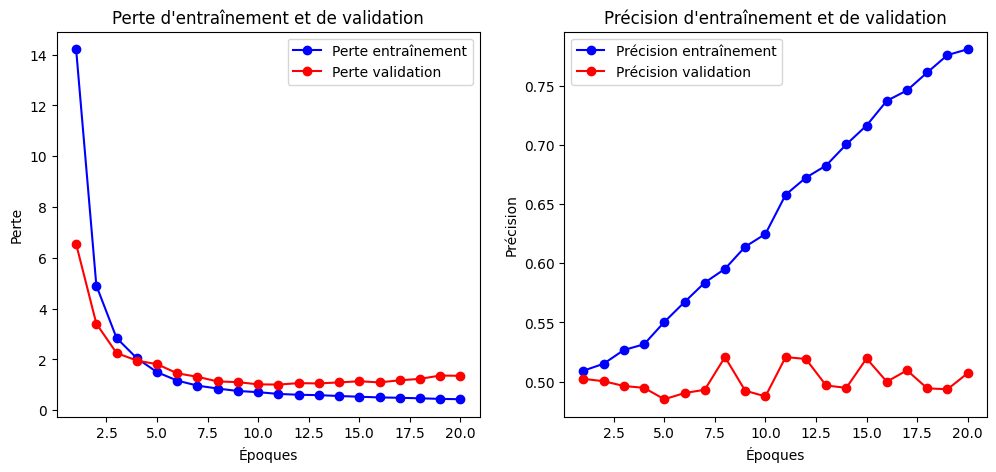

In [ ]:
import matplotlib.pyplot as plt

# Récupérer les données d'entraînement et validation
history_dict = history.history  # Stocke l'historique des métriques

loss = history_dict['loss']# Perte sur les données d'entraînement
val_loss = history_dict['val_loss']# Perte sur les données de validation
accuracy = history_dict['accuracy']# Précision sur l'entraînement
val_accuracy = history_dict['val_accuracy']# Précision sur la validation

epochs = range(1, len(loss) + 1)#Ine liste d'epochs qui va de 1 jusqu’au nombre total d’époques pour tracer les courbes.

# 🔹 Tracer la courbe de la perte (loss)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo-', label='Perte entraînement')
plt.plot(epochs, val_loss, 'ro-', label='Perte validation')
plt.title("Perte d'entraînement et de validation")
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()

# 🔹 Tracer la courbe de la précision (accuracy)
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'bo-', label='Précision entraînement')
plt.plot(epochs, val_accuracy, 'ro-', label='Précision validation')
plt.title("Précision d'entraînement et de validation")
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()

plt.show()


In [70]:
# Évaluer le modèle sur l'ensemble de test
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Perte finale sur l'ensemble de test: {test_loss:.4f}")
print(f"Précision finale sur l'ensemble de test: {test_acc * 100:.2f}%")
#convertir la précision en pourcentage. 

782/782 - 1s - loss: 1.2809 - accuracy: 0.5110 - 674ms/epoch - 862us/step
Perte finale sur l'ensemble de test: 1.2809
Précision finale sur l'ensemble de test: 51.10%
